<a href="https://colab.research.google.com/github/petkimani/Financial-Inclusion/blob/main/Streamlit_checkpoint_2_cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this checkpoint, we are going to work on the 'Financial Inclusion in Africa' dataset that was provided as part of the Financial Inclusion in Africa hosted by the Zindi platform.

Dataset description: The dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. The ML model role is to predict which individuals are most likely to have or use a bank account.

The term financial inclusion means:  individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way.


Instructions

1. Install the necessary packages
2. Import you data and perform basic data exploration phase
Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features
3. Based on the previous data exploration train and test a machine learning classifier
4. Create a streamlit application (locally) and add input fields for your features and a validation button at the end of the form
5. Import your ML model into the streamlit application and start making predictions given the provided features values
6. Deploy your application on Streamlit share:
Create a github and a streamlit share accounts
Create a new git repo
Upload your local code to the newly created git repo
log in to your streamlit account an deploy your application from the git repo


In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import plot_tree

In [ ]:
# load the dataset
df = pd.read_csv('/content/Financial_inclusion_dataset.csv')
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# check information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
# describe the dataset
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [ ]:
# Generate a profiling report
profile_report = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile_report.to_notebook_iframe()

# Generate the profiling report
profile_report.to_file("pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:01<00:00,  7.34it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# check for missing values
df.isnull().sum()

,0
country,0
year,0
uniqueid,0
bank_account,0
location_type,0
cellphone_access,0
household_size,0
age_of_respondent,0
gender_of_respondent,0
relationship_with_head,0


In [ ]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
# drop columns "country", "year", "uniqueid"
df.drop(["country", "year", "uniqueid"], axis=1, inplace=True)

# Create Visualization

In [ ]:
# use plotly to create a pie chart of location_type
fig = px.pie(df, names="location_type", title="Location Type")
fig.show()

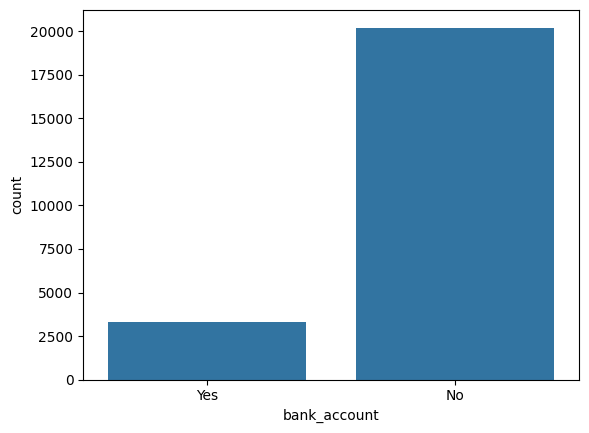

In [ ]:
# use seaborn to create a bar chart of bank_account
sns.countplot(x="bank_account", data=df)
plt.show()

Text(0, 0.5, 'bank_account')

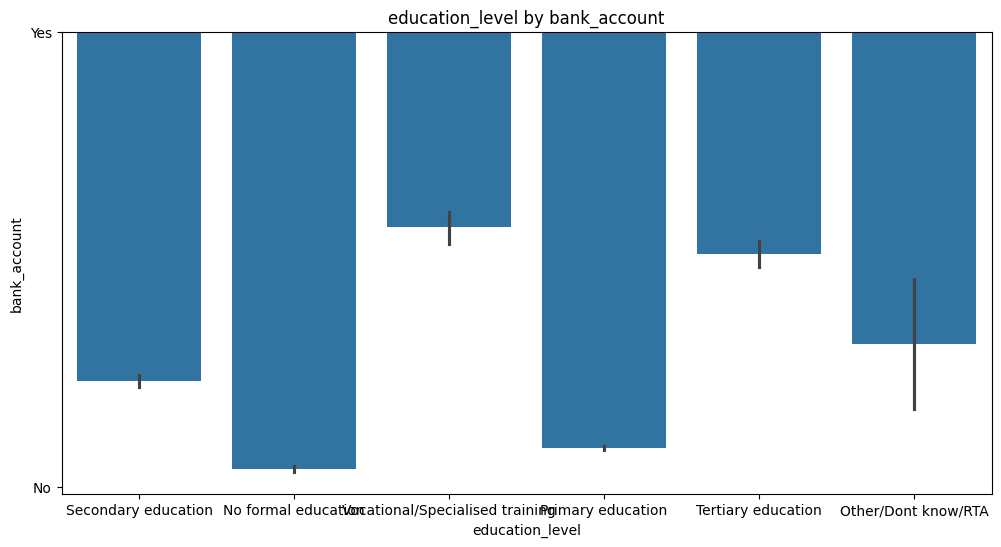

In [ ]:
# plot bar graph using matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x='education_level', y='bank_account', data=df)
plt.title('education_level by bank_account')
plt.xlabel('education_level')
plt.ylabel('bank_account')

In [ ]:
# use plotly to plot histogram of age_of_respondent
fig = px.histogram(df, x="age_of_respondent", nbins=20)
fig.show()

Text(0, 0.5, 'Frequency')

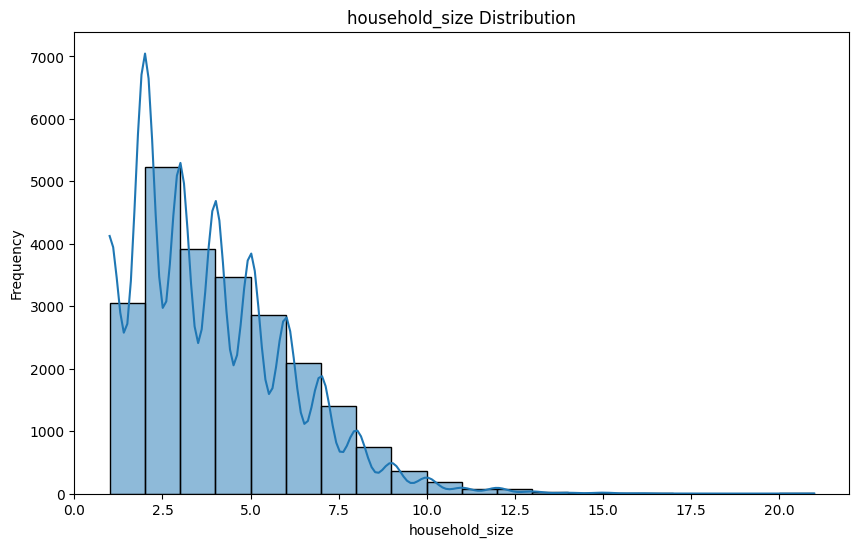

In [ ]:
# plot a histogram to show household_size distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['household_size'], bins=20, kde=True)
plt.title('household_size Distribution')
plt.xlabel('household_size')
plt.ylabel('Frequency')

# Check for outliers

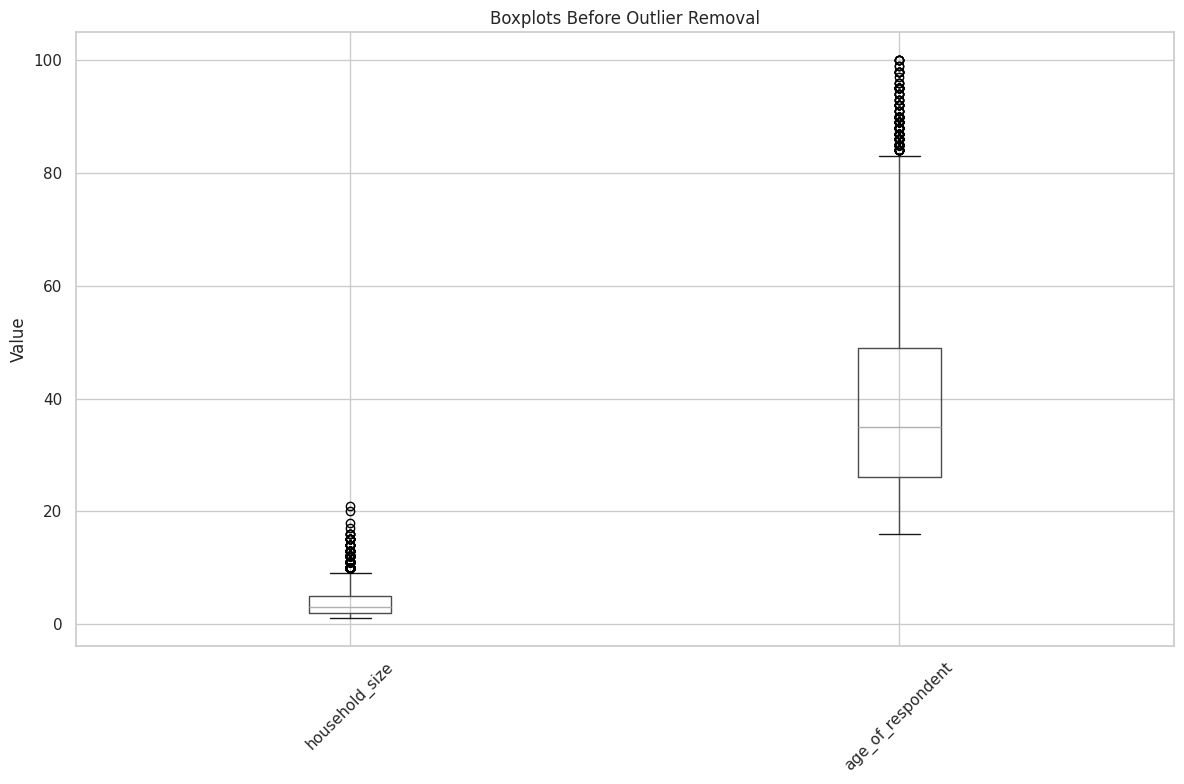

In [ ]:
#plot box plot on numerical columns to handle outliers
# Set plot style
sns.set(style="whitegrid")

# Select only numeric columns for boxplots
numeric_cols = ['household_size', 'age_of_respondent']

# Create initial boxplots before outlier handling
plt.figure(figsize=(12, 8))
df[numeric_cols].boxplot()
plt.title('Boxplots Before Outlier Removal')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

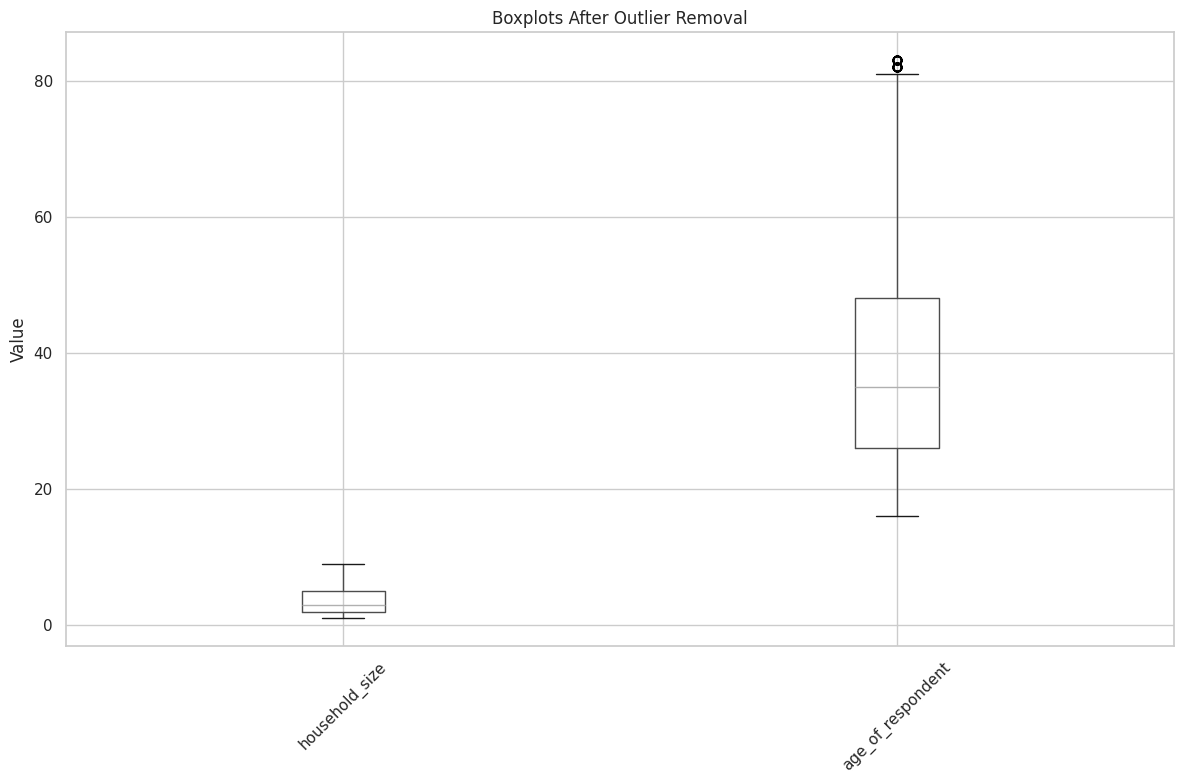

In [ ]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# Remove outliers from numeric columns
df1 = remove_outliers_iqr(df, numeric_cols)

# Create boxplots after outlier handling
plt.figure(figsize=(12, 8))
df1[numeric_cols].boxplot()
plt.title('Boxplots After Outlier Removal')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# show number of rows after dealing with outliers
print("Number of rows after handling outliers:", df1.shape[0])

Number of rows after handling outliers: 22902


# Encode Categorical Variables

In [ ]:
# Use map function to encode "bank_account", "location_type", "cellphone_access", "gender_of_respondent" to numerical
df1['bank_account'] = df1['bank_account'].map({'Yes': 1, 'No': 0})
df1['location_type'] = df1['location_type'].map({'Rural': 0, 'Urban': 1})
df1['cellphone_access'] = df1['cellphone_access'].map({'Yes': 1, 'No': 0})
df1['gender_of_respondent'] = df1['gender_of_respondent'].map({'Male': 1, 'Female': 0})

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22902 entries, 0 to 23522
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   bank_account            22902 non-null  int64 
 1   location_type           22902 non-null  int64 
 2   cellphone_access        22902 non-null  int64 
 3   household_size          22902 non-null  int64 
 4   age_of_respondent       22902 non-null  int64 
 5   gender_of_respondent    22902 non-null  int64 
 6   relationship_with_head  22902 non-null  object
 7   marital_status          22902 non-null  object
 8   education_level         22902 non-null  object
 9   job_type                22902 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.9+ MB


In [ ]:
# use label encoder to encode "relationship_with_head", "marital_status", "education_level", "job_type" to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['relationship_with_head'] = le.fit_transform(df1['relationship_with_head'])
df1['marital_status'] = le.fit_transform(df1['marital_status'])
df1['education_level'] = le.fit_transform(df1['education_level'])
df1['job_type'] = le.fit_transform(df1['job_type'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22902 entries, 0 to 23522
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   bank_account            22902 non-null  int64
 1   location_type           22902 non-null  int64
 2   cellphone_access        22902 non-null  int64
 3   household_size          22902 non-null  int64
 4   age_of_respondent       22902 non-null  int64
 5   gender_of_respondent    22902 non-null  int64
 6   relationship_with_head  22902 non-null  int64
 7   marital_status          22902 non-null  int64
 8   education_level         22902 non-null  int64
 9   job_type                22902 non-null  int64
dtypes: int64(10)
memory usage: 1.9 MB


In [ ]:
df1.head()

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,1,0,1,3,24,0,5,2,3,9
1,0,0,0,5,70,0,1,4,0,4
2,1,1,1,5,26,1,3,3,5,9
3,0,0,1,5,34,0,1,2,2,3
4,0,1,0,8,26,1,0,3,2,5


# Build a Decision Tree model

In [ ]:
#Calculate the gini impurity
#ensure 'banking_crisis' column is dropped from the features
X = df1.drop('bank_account', axis=1)
y = df1['bank_account']

#Train decision tree
tree = DecisionTreeClassifier(criterion = 'gini')
tree.fit(X, y)

#Show feature importance
feature_importance = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

age_of_respondent         0.328894
education_level           0.197986
household_size            0.157803
job_type                  0.129646
marital_status            0.059866
relationship_with_head    0.048358
location_type             0.032804
gender_of_respondent      0.022830
cellphone_access          0.021814
dtype: float64


In [ ]:
#use plotly to plot visual representation of the features
fig = px.bar(feature_importance, orientation='h')
fig.show()

In [ ]:
# Train decision tree model
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train decision tree
# Corrected the parameter name from min_sample_split to min_samples_split
dt = DecisionTreeClassifier(max_depth = 4, criterion = 'gini', min_samples_split = 10, random_state = 42)
dt.fit(X_train, y_train)

#Predict on test set
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.8703339882121808

In [ ]:
#print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3899
           1       0.68      0.25      0.36       682

    accuracy                           0.87      4581
   macro avg       0.78      0.61      0.64      4581
weighted avg       0.85      0.87      0.84      4581



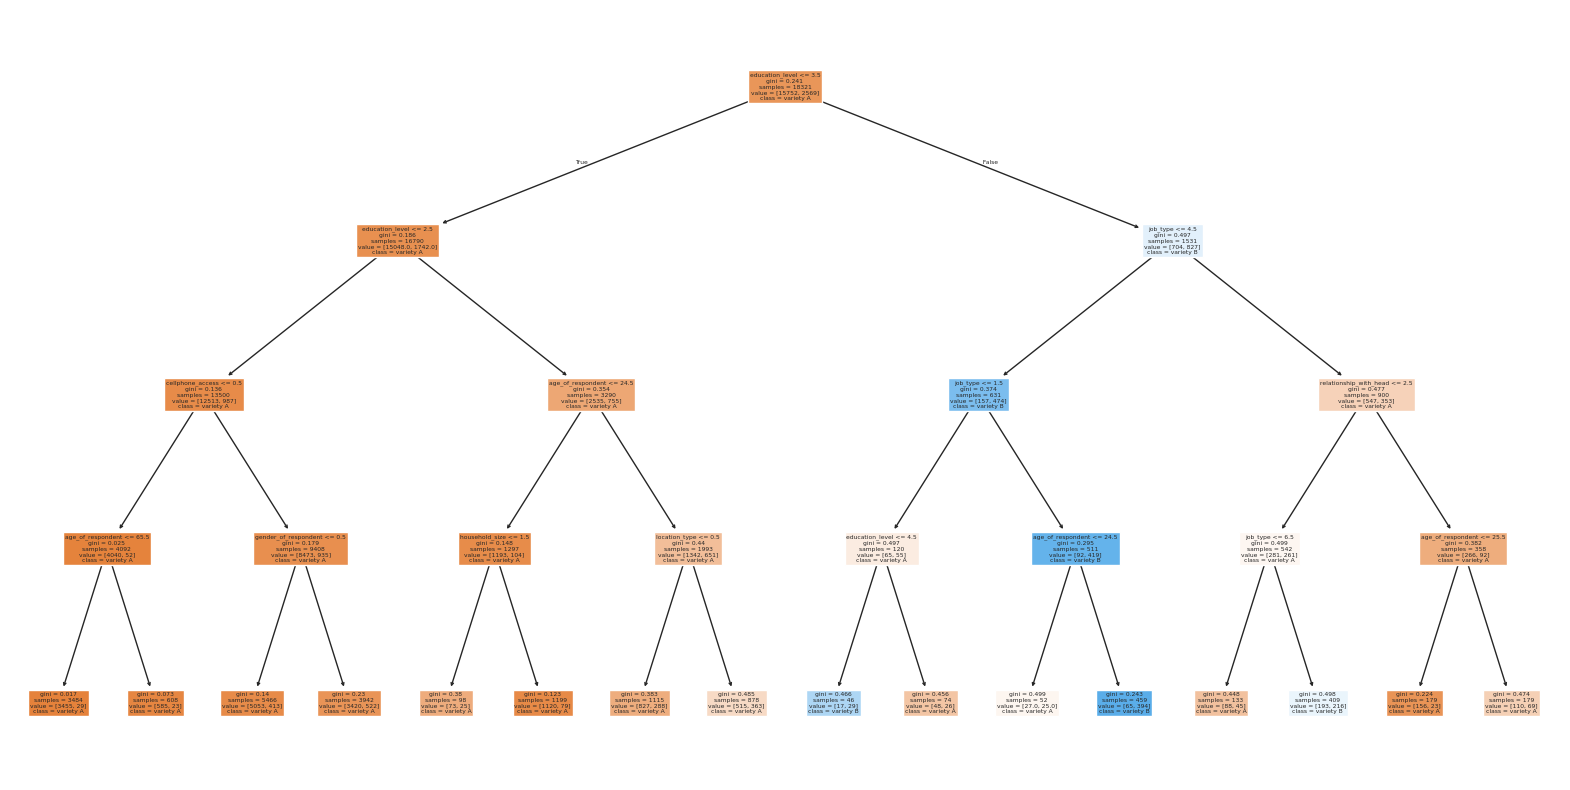

In [ ]:
#print a decision tree and give a large figure size
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['variety A', 'variety B', 'variety C'])
plt.show()

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

#cross validation with k=5, 5 folds
scores = cross_val_score(dt, X, y, cv=5)
print(scores)

[0.86247544 0.8760096  0.86855895 0.85262009 0.89344978]


In [ ]:
#print mean of all scores
scores.mean()

np.float64(0.8706227735787365)

In [ ]:
# Train random forest model
from sklearn.ensemble import RandomForestClassifier

#Train random forest
rf = RandomForestClassifier(n_estimators=100, max_depth=4, criterion = 'gini', random_state=42)
rf.fit(X_train, y_train)

#Predict and evaluate
y_rf_pred = rf.predict(X_test)
accuracy_score(y_test, y_rf_pred)

0.8707705741104562

In [ ]:
#print classification report
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      3899
           1       0.80      0.17      0.29       682

    accuracy                           0.87      4581
   macro avg       0.84      0.58      0.61      4581
weighted avg       0.86      0.87      0.83      4581



In [ ]:
#compare the accuracies
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred))
print('Random Forest Accuracy:', accuracy_score(y_test, y_rf_pred))

Decision Tree Accuracy: 0.8703339882121808
Random Forest Accuracy: 0.8707705741104562
